# DSP homework 3

### professor Massoud Babaie-Zadeh


##### student name : kasra fallah 

##### student number : 97109987


##### Exercise1.1
###### part a

Create vectors b and a that contain the coefficients of x[n] and y[n], respectively, in the
following difference equation:

y[n] + 0.9y[n-2] = 0.3x[n] + 0.6x[n-1] + 0.3x[n-2]

In [778]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fft as sc
import cmath
import scipy.signal as sig

In [694]:
a = np.array([1,0,-0.9])
b = np.array([0.3,0.6,0.3])

In [695]:
print(a)
print(b)

[ 1.   0.  -0.9]
[0.3 0.6 0.3]


###### part c

In [696]:
sig_len = 128

In [697]:
x = np.zeros(sig_len)
x[0] = 1
y = np.zeros(sig_len)

In [698]:
for i in range(0,sig_len):
    if i == 0:
        y[ i ] = b[ 0 ] * x[ i ]
    elif i == 1:
        y[ i ] = b[ 0 ] * x[ i ] + b[ 1 ] * x[ i - 1 ]
    elif i >1 :
        y[ i ] = a[2] * y[i-2] + b[ 0 ] * x[ i ] + b[ 1 ] * x[ i - 1 ] + b[ 2 ] * x[ i - 2 ]

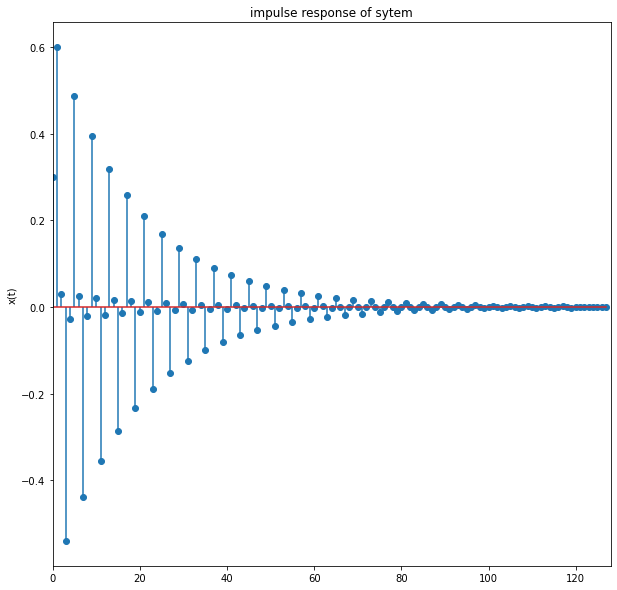

In [699]:
n = np.arange(sig_len);
plt.rcParams['figure.figsize'] = [10,10]    
plt.stem(n, y)
plt.ylabel('x(t)');
plt.title(r'impulse response of sytem');
plt.xlim([0, 128]);
plt.show()


##### Exercise1.2
###### part a
Use the filterfunctionto generate and plot the impulse response h[n] of the following
difference equation. Plot h[n] in the range of -10 < n =<100.

y[n] = 1.8cos (pi /16) y[n—1] +0.8ly[n—2] = x[n] + %x[n—1] 

In [700]:
a = np.array([1,-1.8*  math.cos(math.pi /16),0.81])
b = np.array([1,0.5,0])


In [701]:
sig_len = 100 + 10 + 1
x = np.zeros(sig_len)
y = np.zeros(sig_len)
x[12] = 1

In [702]:
y = sig.lfilter( b , a  , x )

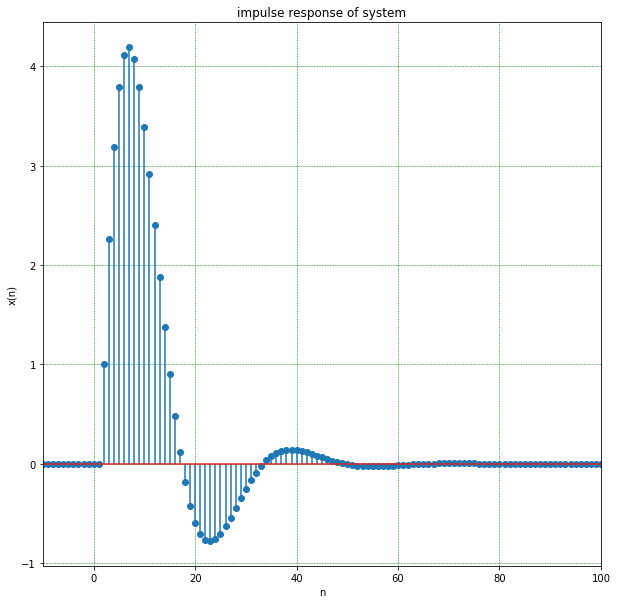

In [703]:
n = np.arange(-10,101);
plt.stem(n, y)
plt.ylabel('x(n)');
plt.xlabel('n');
plt.title(r'impulse response of system');
plt.xlim([-10, 100]);
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

###### Exercise 1.1
page16

###### part b

In [704]:
def  dtft( h, N ):

    N = int(np.fix(N))
    L = len(h); 
    if(N<L):
        print('DTFT:  data samples cannot exceed  freq samples')
    W = (2*math.pi/N) * np.arange(0, N)
    mid=int(np.ceil(N/2))
    W[mid:] = W[mid:] - 2*math.pi
    h = h
    W = sc.fftshift(W)
    H = sc.fftshift(sc.fft(h,N))
   
    
    return (H,W)

In [711]:
def plotdtft(H,W):
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.subplot(3,1,1)
    plt.plot(W, np.abs(H) )
    plt.ylabel(r'$|X|$');
    plt.title(r'magnitud of  $x(e^ (jw) )$')
    plt.xlim([-math.pi,math.pi]);
    plt.xlabel(r'$omega$(rad/s)');
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.subplot(2,1,2)
    plt.plot(W, np.angle(H ))
    plt.ylabel(r'$\angle X(f)$')
    plt.title(r'Phase of   $x(e^ (jw) )$')
    plt.xlim([-math.pi,math.pi]);
    plt.xlabel(r'$omega$(rad/s)');
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)



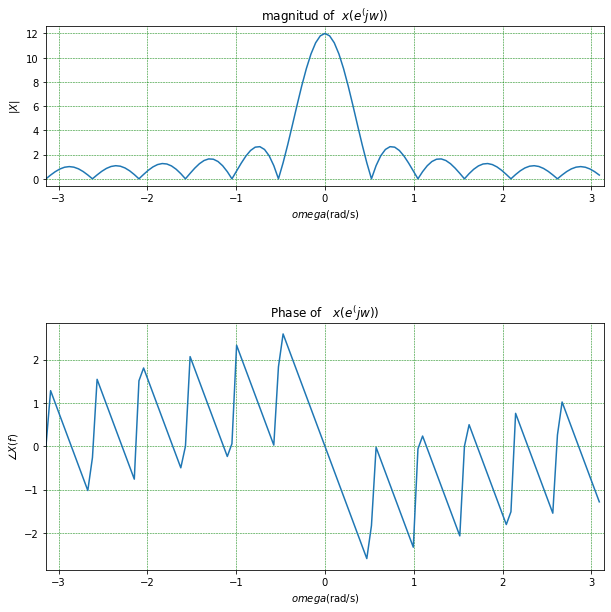

In [713]:
L = 12
x = np.ones(L)
N = 12*10
(H,W) = dtft(x,N)
plotdtft(H,W)
plt.show()

##### part c

<ipython-input-711-799a2d63fd87>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,1)
<ipython-input-711-799a2d63fd87>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,1,2)
<ipython-input-711-799a2d63fd87>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

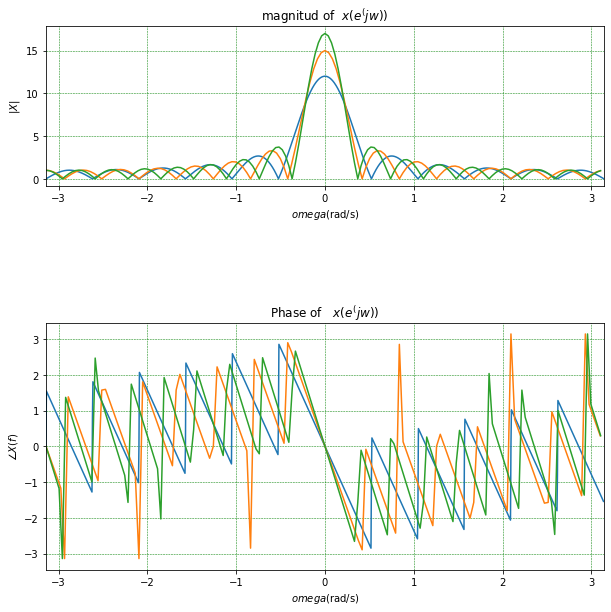

In [779]:
L = 12
x = np.ones(L)
N = 12*100
(H12,W12) = dtft(x,N)
plotdtft(H12,W12)

L = 15
x = np.ones(L)
N = 15*10
(H15,W15) = dtft(x,N)
plotdtft(H15,W15)

L = 17
x = np.ones(L)
N = 17*10
(H17,W17) = dtft(x,N)
#plt.legend(['l = 12','l = 15','l = 17'])
plotdtft(H17,W17)
#plt.legend(['l = 12','l = 15','l = 17'])
plt.show()

##### results of this part

we could obviously see that the maximum value of magnitude has been grown up and the zero-crossing point became closer to other points after growing the "L" value  

###### EXERCISE 1.2

In [715]:
#define asinc function
def asinc(w, l):
    N = len(w)
    mid=int(np.ceil(N/2))
    a1 = w[0:mid]
    a2 = w[mid+1:N]
    out1 = np.sin((a1*l)/2)/np.sin((a1)/2)
    out2 = np.array([l])
    out3 = np.sin((a2*l)/2)/np.sin((a2)/2)
    a = np.concatenate((out1,out2,out3), axis=0)
    return a

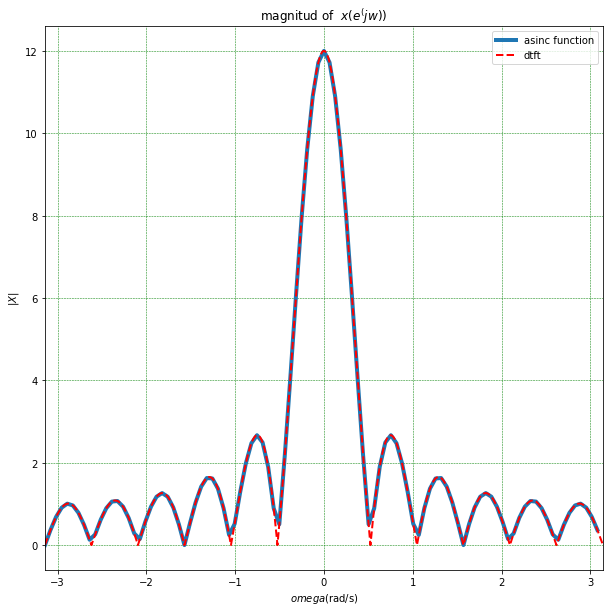

In [716]:
N = 100
W1 = (2*math.pi/N) * np.arange(0, N)
mid=int(np.ceil(N/2))
W1[mid:] = W1[mid:] - 2*math.pi
W_asinc = sc.fftshift(W1)
H_asinc = asinc(W_asinc,12)
#print(len(H))
plt.plot(W_asinc, abs(H_asinc), linewidth=4 )
plt.ylabel(r'$|X|$');
plt.title(r'magnitud of  $x(e^ (jw) )$')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)


plt.plot(W12, abs(H12),'r--' ,linewidth=2)
plt.ylabel(r'$|X|$');
plt.title(r'magnitud of  $x(e^ (jw) )$')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.legend(['asinc function','dtft'])
plt.show()


In [717]:
def asinc_alised(w, l):
    N = len(w)
    mid=int(np.ceil(N/2))
    a1 = w[0:mid]
    a2 = w[mid+1:N]
    out1 = np.sin((a1*l)/2)/np.sin((a1)/2)
    out2 = np.array([l])
    out3 = np.sin((a2*l)/2)/np.sin((a2)/2)
    a = np.concatenate((out1,out2,out3), axis=0)
    phase = np.exp(-1*complex(0+1j)*w*(l-1)/2)
    a = np.multiply(a,phase)
    return a

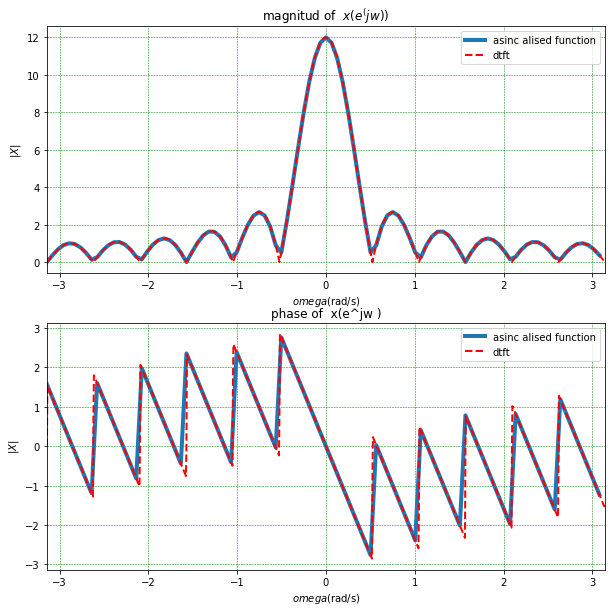

In [733]:
N = 100
W2 = (2*math.pi/N) * np.arange(0, N)
mid=int(np.ceil(N/2))
W2[mid:] = W2[mid:] - 2*math.pi
W_asinc_alised = sc.fftshift(W2)
H_asinc_alised = asinc_alised(W_asinc_alised,12)
#print(len(H))
plt.subplot(2,1,1)
plt.plot(W_asinc_alised , abs(H_asinc_alised), linewidth=4 )
plt.ylabel(r'$|X|$');
plt.title(r'magnitud of  $x(e^ (jw) )$')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.plot(W12, abs(H12),'r--' ,linewidth=2)
plt.ylabel(r'$|X|$');
plt.title(r'magnitud of  $x(e^ (jw) )$')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(['asinc alised function','dtft'])
plt.subplot(2,1,2)

plt.plot(W_asinc_alised , np.angle(H_asinc_alised), linewidth=4 )
plt.ylabel(r'$|X|$');
plt.title(r'magnitud of  x(e^ (jw) )')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

plt.plot(W12, np.angle(H12),'r--' ,linewidth=2)
plt.ylabel(r'$|X|$');
plt.title(r'phase of  x(e^jw )')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(['asinc alised function','dtft'])
plt.show()


##### Exercise 1.3

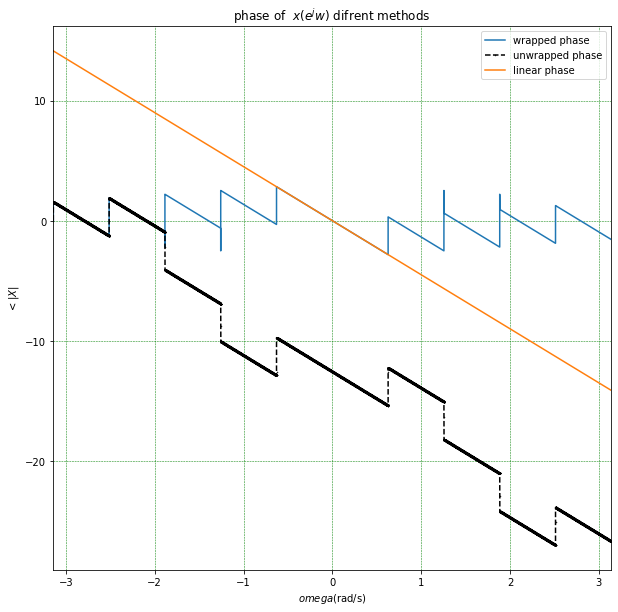

In [742]:
L = 10
x1 = np.ones(L)
(X1,w) = dtft(x1, 100000)
phase = np.angle(X1)
plt.plot(w, phase)
unwrapped_phase = np.unwrap(phase)
plt.plot(w, unwrapped_phase, 'k--.', markersize = 1)
plt.plot(w, -(L - 1)/2*w)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.legend(['wrapped phase','unwrapped phase', 'linear phase'])
plt.ylabel(r'$<|X|$');
plt.title(r'phase of  $x(e^jw )$ difrent methods')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

##### Exercise 3.1

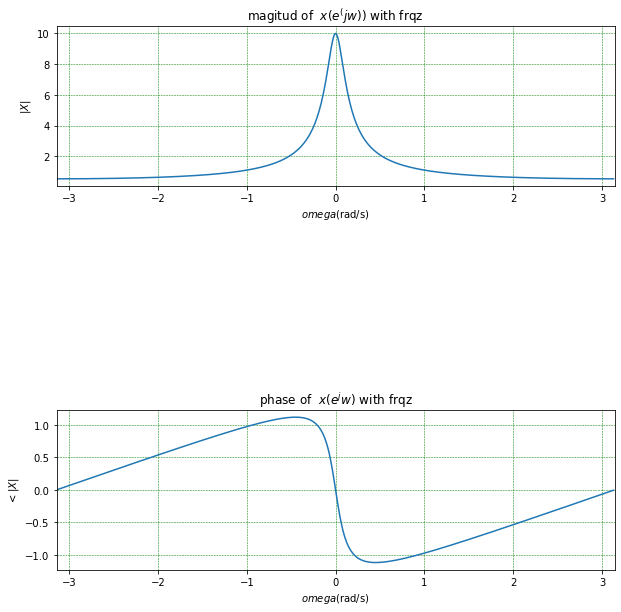

In [743]:
a = [1]
b = [1, -0.9]
(W,X) = sig.freqz(a , b , whole = True )
X = sc.fftshift(X)
plt.subplot(3,1,1)
plt.plot(W - math.pi, np.abs(X))
plt.xlim([- math.pi, math.pi])
plt.ylabel(r'$|X|$');
plt.title(r'magitud of  $x(e^ (jw) )$ with frqz')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.subplot(3,1,3)
plt.plot(W - math.pi, np.angle(X))
plt.xlim([- math.pi, math.pi])
plt.ylabel(r'$<|X|$');
plt.title(r'phase of  $x(e^jw )$ with frqz')
plt.xlim([-math.pi,math.pi]);
plt.xlabel(r'$omega$(rad/s)');
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

##### Exercise 4.2

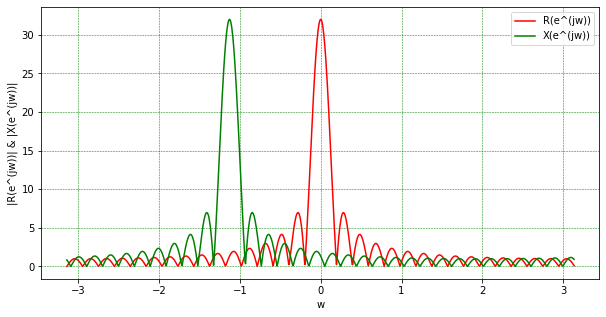

In [763]:

# a
theta0 = 2 * math. pi / math.sqrt( 31 )
r = np.ones( 32 )
N = np.arange(0,32)
s = np.exp(-(0 + 1j) * N *theta0)
x = r * s
(X,w) = dtft(x,1000)
(R,wr) = dtft(r,1000)
plt.plot(w, abs(R),'r')
plt.plot(wr, abs(X),'g')
plt.legend(['R(e^(jw))','X(e^(jw))'])
plt.xlabel('w')
plt.ylabel('|R(e^(jw))| & |X(e^(jw))|')
plt.rcParams['figure.figsize'] = [10, 5]
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

results

as we see exp(-j * theta * n) make shift in frequency domin as we expected

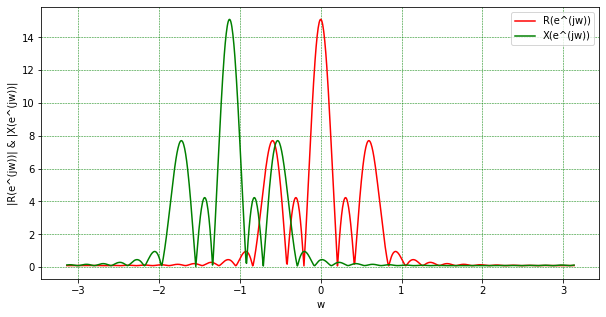

In [764]:
# b
theta0 = 2 * math. pi / math.sqrt( 31 )
N = np.arange(0,32)
s = np.exp(-(0 + 1j) * N *theta0)
r = -0.5* np.cos(2 * math.pi/L*N) + 0.5
x = r * s
(X,w) = dtft(x,1000)
(R,wr) = dtft(r,1000)
plt.plot(w, abs(R),'r')
plt.plot(wr, abs(X),'g')
plt.legend(['R(e^(jw))','X(e^(jw))'])
plt.xlabel('w')
plt.ylabel('|R(e^(jw))| & |X(e^(jw))|')
plt.rcParams['figure.figsize'] = [10, 5]
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

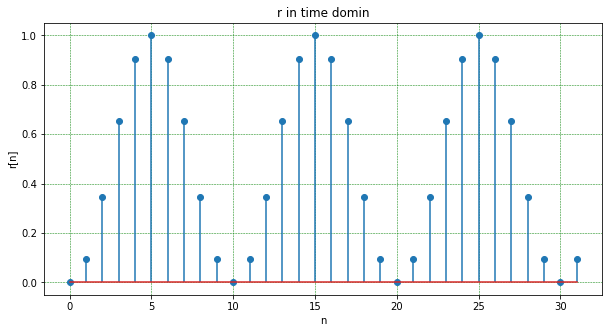

In [765]:
plt.stem(N,r)
plt.xlabel('n')
plt.ylabel('r[n]')
plt.title('r in time domin')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

##### Exercise 1.1 

page 30

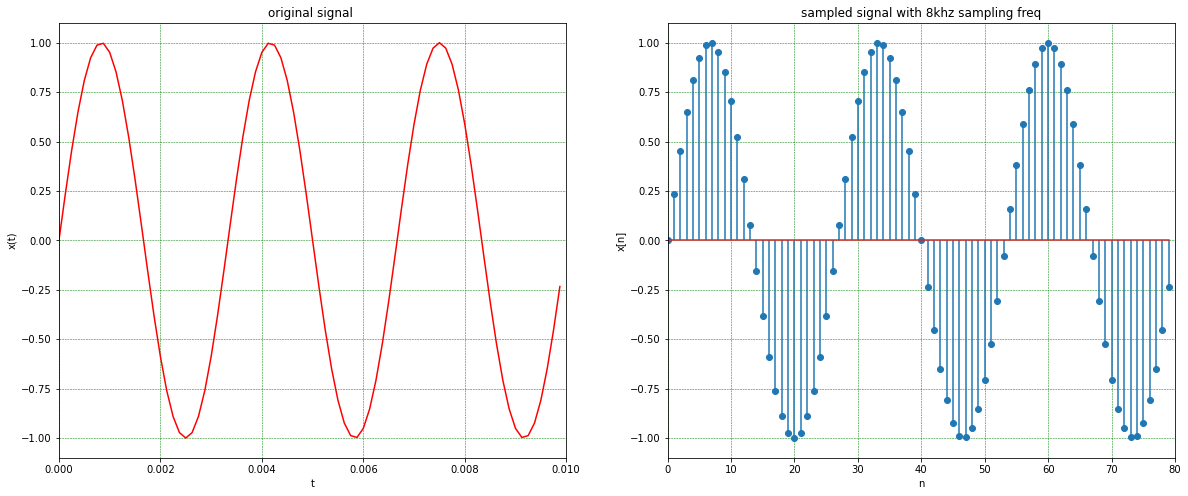

In [777]:
# a
plt.rcParams['figure.figsize'] = [20,8]
fig, axs = plt.subplots(2, 4)
f0 = 300
fs = 8000
T = 10 *10**-3
n = np.arange(0 , T , 1 / fs )
sine_wave = np.sin(2 * math.pi * f0  * n)
plt.subplot(1,2,1)
plt.plot(n , sine_wave, 'r')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlim([0,T])
plt.title( 'original signal ')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplot(1,2,2)
plt.stem(n*fs,sine_wave)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlim([0,len(n)])
plt.title( 'sampled signal with 8khz sampling freq')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()


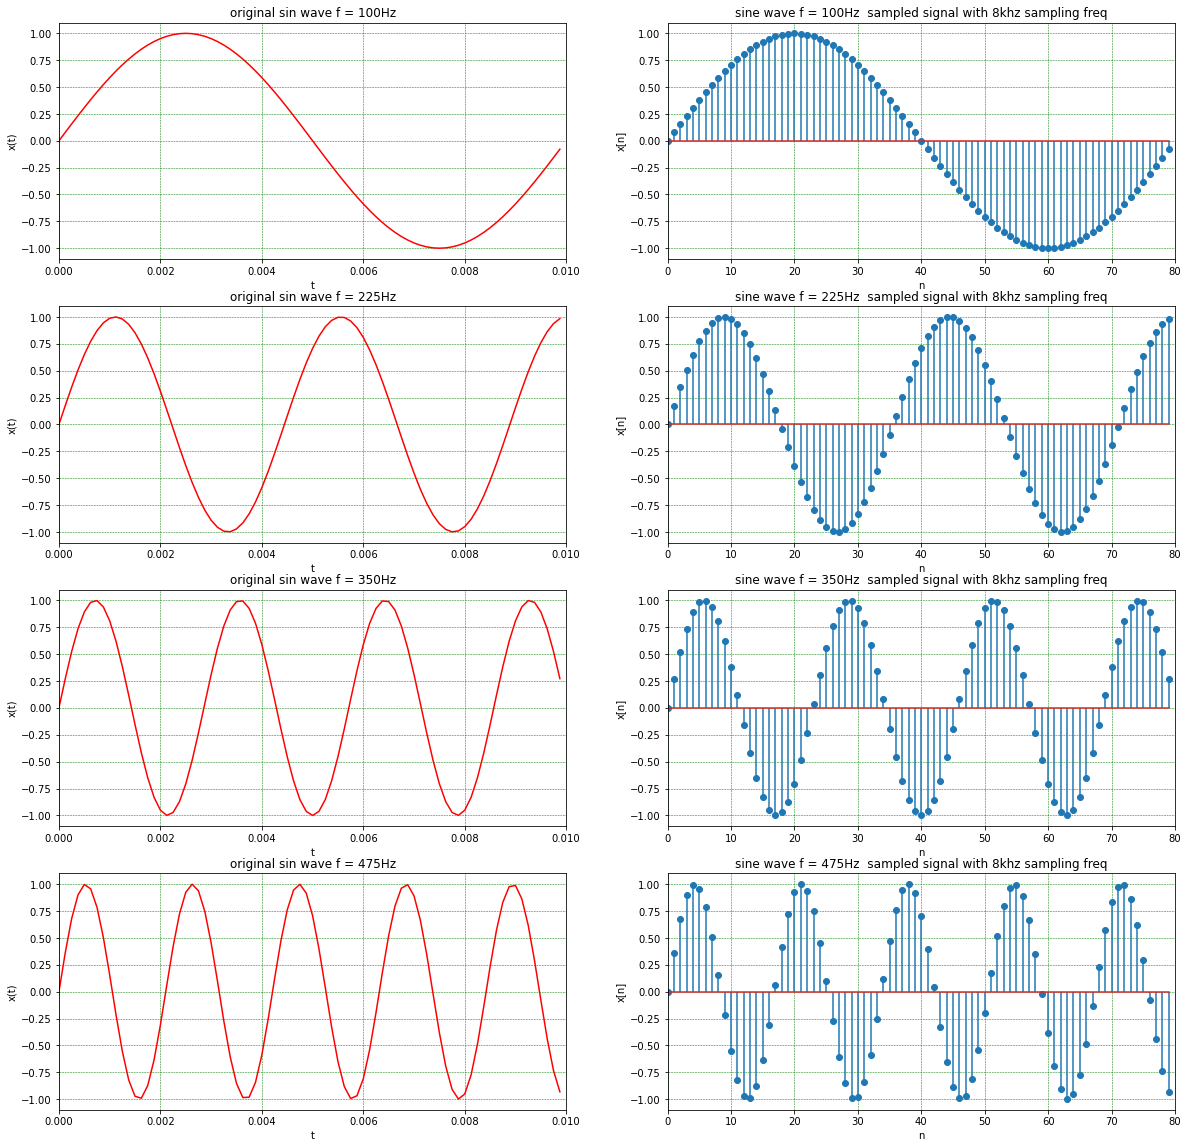

In [748]:
# c
f = np.arange(100,476,125)
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(2, 4)
for i in range(0,len(f)):
    #print(i)
    n = np.arange(0 , T , 1 / fs )
    sine_wave = np.sin(2 * math.pi * f[i]  * n)
    plt.subplot(4,2,1+2*i)
    plt.plot(n , sine_wave, 'r')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.xlim([0,T])
    plt.title( 'original sin wave f = '+str(f[i])+ 'Hz')
    plt.xlabel('t')
    plt.ylabel('x(t)')

    plt.subplot(4,2,2+2*i)
    plt.stem(n*fs,sine_wave)
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.xlim([0,len(n)])
    plt.title( 'sine wave f = '+str(f[i])+'Hz  sampled signal with 8khz sampling freq')
    plt.xlabel('n')
    plt.ylabel('x[n]')

plt.show()
    


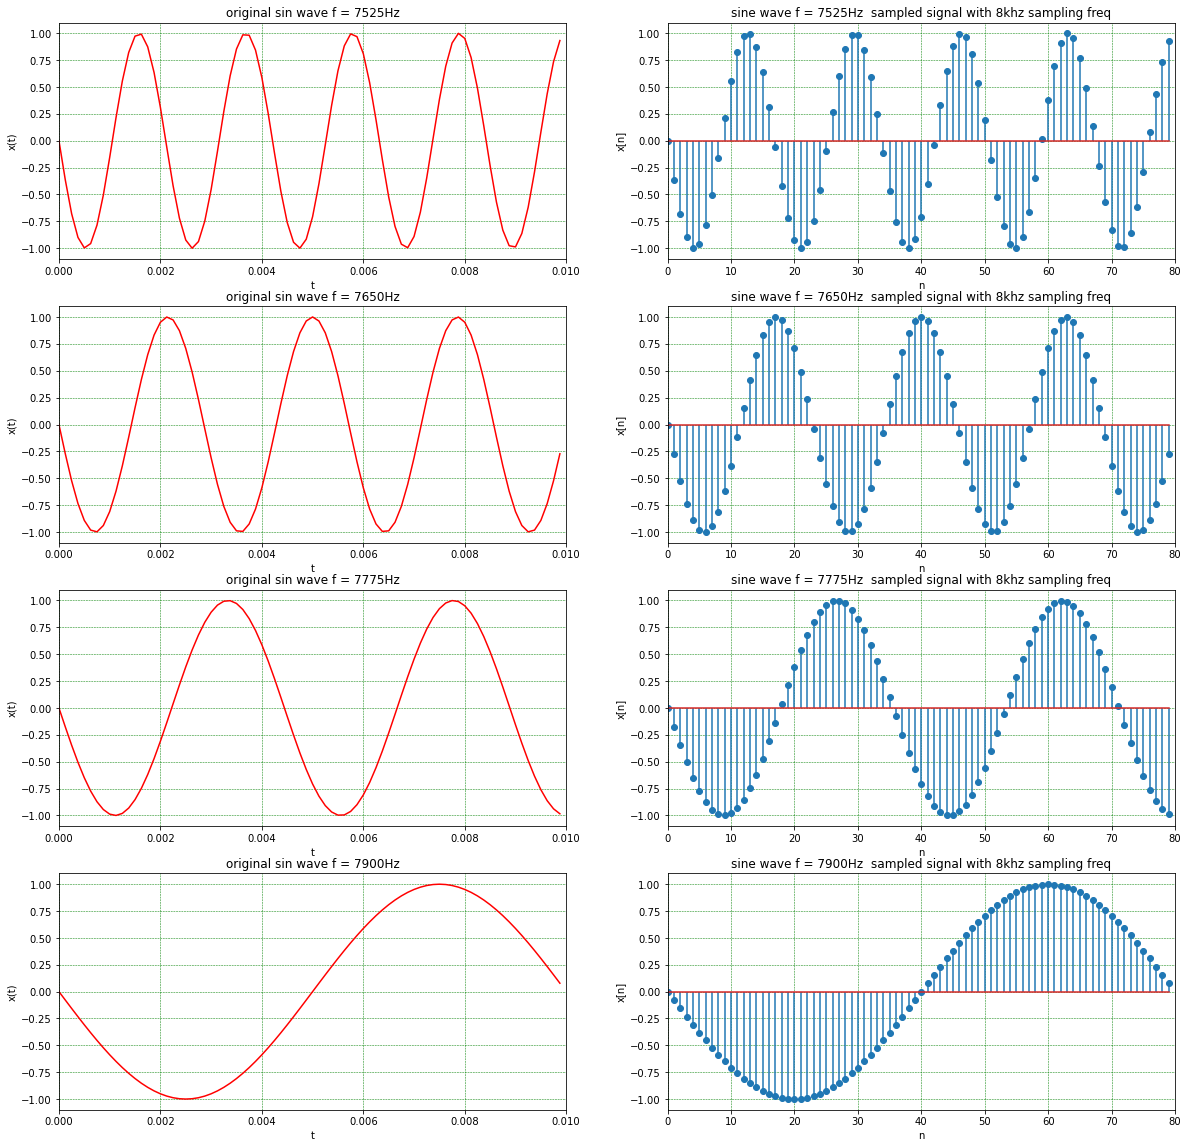

In [749]:
#d 
f = np.arange(7525,7910,125)
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(2, 4)
for i in range(0,len(f)):
    #print(i)
    n = np.arange(0 , T , 1 / fs )
    sine_wave = np.sin(2 * math.pi * f[i]  * n)
    plt.subplot(4,2,1+2*i)
    plt.plot(n , sine_wave, 'r')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.xlim([0,T])
    plt.title( 'original sin wave f = '+str(f[i])+ 'Hz')
    plt.xlabel('t')
    plt.ylabel('x(t)')

    plt.subplot(4,2,2+2*i)
    plt.stem(n*fs,sine_wave)
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.xlim([0,len(n)])
    plt.title( 'sine wave f = '+str(f[i])+'Hz  sampled signal with 8khz sampling freq')
    plt.xlabel('n')
    plt.ylabel('x[n]')

plt.show()

###### results


as we have seen in the graphs part d sine wave is inverted around the X axis. we could take that as result of 

sin[2pi[fs-f0]/fs * n] = sin[-2 * pi * f0 / fs * n + 2 * pi * n] = sin[-2 * pi * f0 / fs * n] = -sin[2 * pi * f0 / fsn]

so just we must to calculate fs-f0 to see each of signals freq

#1 8000 - 7525 = 475

#2 8000 - 765 = 350

#3 8000 - 7775 = 225

#4 8000 - 7900 = 100

as we showed apparent frequency of sine wave is decreasing
(tip: all of apparent frequency are real frequency of part A)

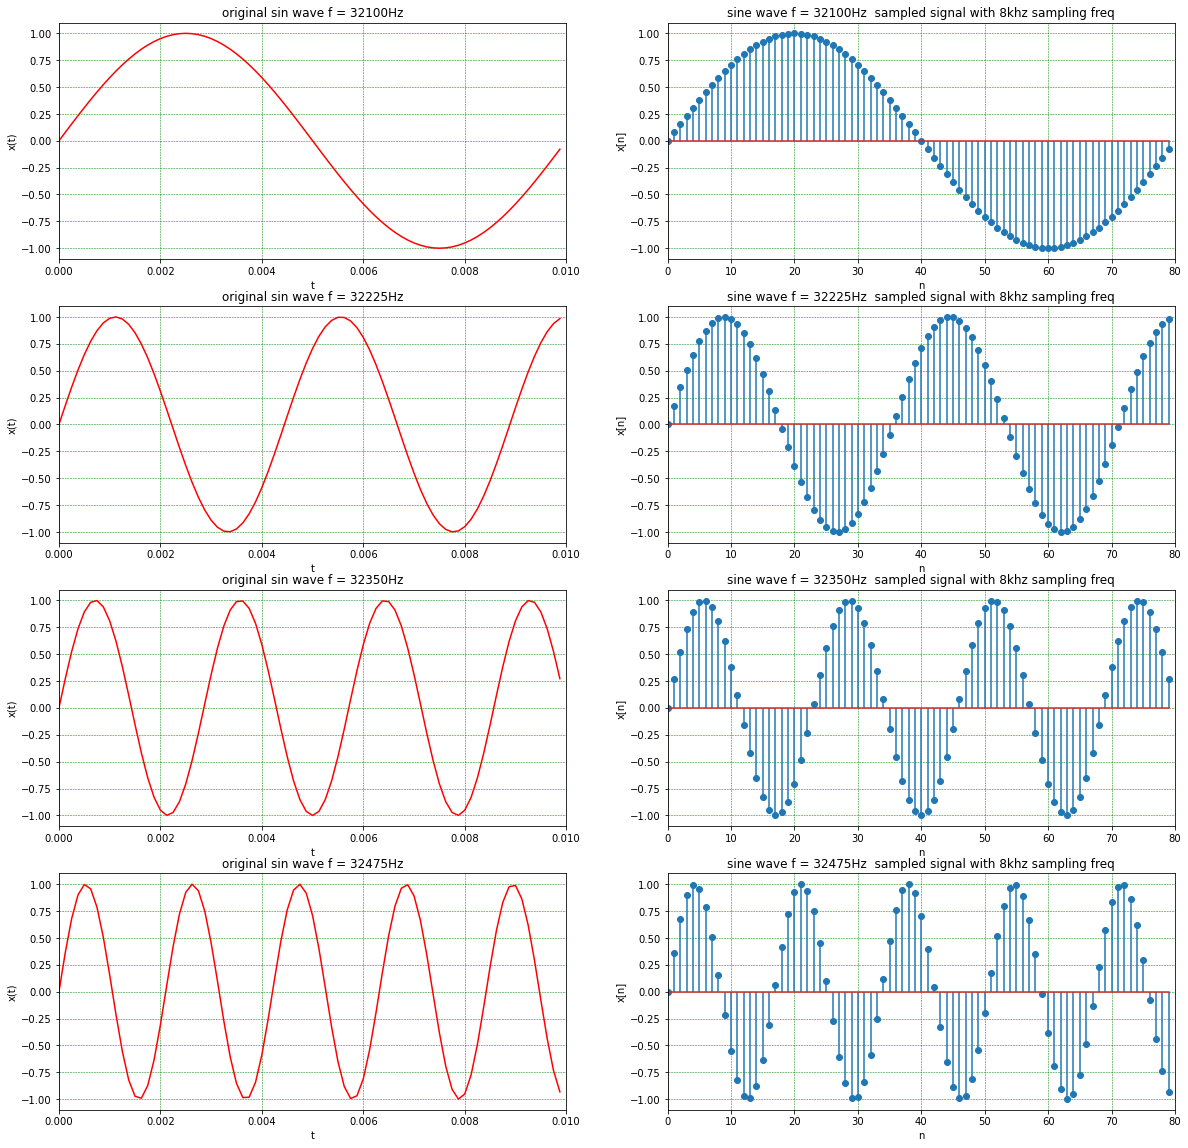

In [750]:
#d 
f = np.arange(32100,32479,125)
plt.rcParams['figure.figsize'] = [20, 20]
fig, axs = plt.subplots(2, 4)
for i in range(0,len(f)):
    #print(i)
    n = np.arange(0 , T , 1 / fs )
    sine_wave = np.sin(2 * math.pi * f[i]  * n)
    plt.subplot(4,2,1+2*i)
    plt.plot(n , sine_wave, 'r')
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.xlim([0,T])
    plt.title( 'original sin wave f = '+str(f[i])+ 'Hz')
    plt.xlabel('t')
    plt.ylabel('x(t)')

    plt.subplot(4,2,2+2*i)
    plt.stem(n*fs,sine_wave)
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    plt.xlim([0,len(n)])
    plt.title( 'sine wave f = '+str(f[i])+'Hz  sampled signal with 8khz sampling freq')
    plt.xlabel('n')
    plt.ylabel('x[n]')

plt.show()

##### RESULTS

in this part, frequency is more than Fs so we must calculate f0 / Fs and find the remaining part of this division.check below

f0/fs = a + b as b <1

sin[2 * pi * f0 / fs * n] = sin [ 2* pi * (a + b)] = sin[2 * pi * b *n]
 
 so we have 
 
#1 32100 % 8000 = 100

#2 32225 % 8000 = 225

#3 32350 % 8000 = 350

#4 32475 % 8000 = 475

as we se the apparent frequency i increasing in this part
 

##### Exercise 1.2(optianal)

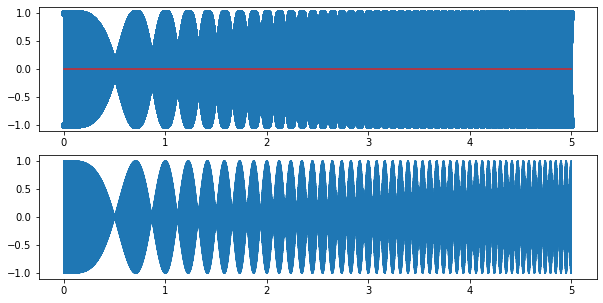

In [756]:
fs = 8000
T = 100*50*10**-3
t = np.arange(0,T,1/fs)
u = 2
f1 = 4000
c = np.cos(math.pi*u*t**2+2*math.pi*f1*t + 0)
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(2,1,1)
plt.stem(t,c)
plt.subplot(2,1,2)
plt.plot(t,c)
plt.show()

In [757]:
from IPython.display import Audio
Audio(c,rate=fs)